### Importing saved Model from file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/ML PROJECT'

/content/drive/MyDrive/ML PROJECT


In [ ]:
import joblib
import os

model_filename = "svm_model.pkl"

# Check if the model file exists
if os.path.isfile(model_filename):
    # Load the saved SVM model from a file
    svm_classifier = joblib.load(model_filename)
    print(f"Model loaded from {model_filename}")
else:
    print(f"The model file {model_filename} does not exist. Please train and save the model first.")

Model loaded from svm_model.pkl


### Loading the dataset

In [5]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('spam_ham_dataset.csv')


### Dropping unnecessary columns

In [6]:
df = df.drop(df.columns[0], axis=1)
df = df.drop("label", axis=1)


### Viewing the dataframe

In [ ]:
print(df)

                                                   text  label_num
0     Subject: enron methanol ; meter # : 988291\r\n...          0
1     Subject: hpl nom for january 9 , 2001\r\n( see...          0
2     Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3     Subject: photoshop , windows , office . cheap ...          1
4     Subject: re : indian springs\r\nthis deal is t...          0
...                                                 ...        ...
5166  Subject: put the 10 on the ft\r\nthe transport...          0
5167  Subject: 3 / 4 / 2000 and following noms\r\nhp...          0
5168  Subject: calpine daily gas nomination\r\n>\r\n...          0
5169  Subject: industrial worksheets for august 2000...          0
5170  Subject: important online banking alert\r\ndea...          1

[5171 rows x 2 columns]


### Getting Summary

In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Get information about the dataset
print(df.info())

# Get summary statistics
print(df.describe())


                                                text  label_num
0  Subject: enron methanol ; meter # : 988291\r\n...          0
1  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  Subject: photoshop , windows , office . cheap ...          1
4  Subject: re : indian springs\r\nthis deal is t...          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB
None
         label_num
count  5171.000000
mean      0.289886
std       0.453753
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


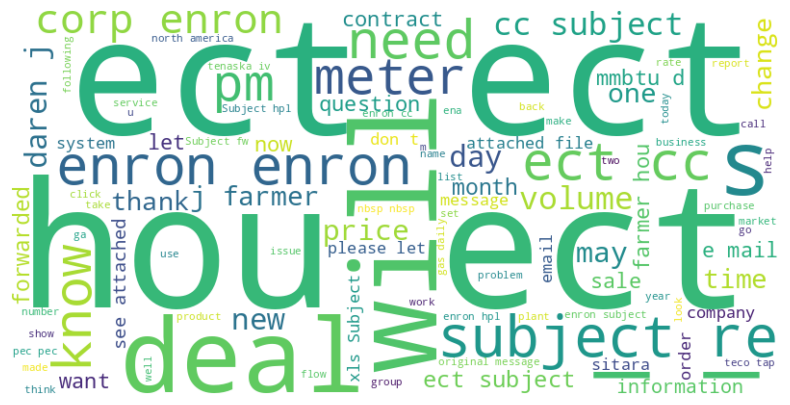

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all email text into a single string
all_text = ' '.join(df['text'])

# Create a WordCloud object with optional settings (e.g., background color, max words)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


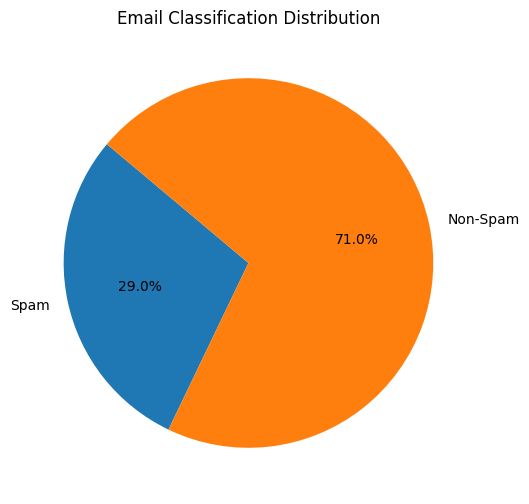

In [2]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails
spam_count = df['label_num'].sum()
non_spam_count = len(df) - spam_count

# Prepare data for the pie chart
labels = ['Spam', 'Non-Spam']
sizes = [spam_count, non_spam_count]

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Email Classification Distribution')

# Display the chart
plt.show()


### Assigning feature and labels

In [7]:
# Example assuming 'label' is the target variable and 'feature_column' is a feature
X = df[['text']]
y = df['label_num']


### Fitting and transforming feature set

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Fit and transform the 'text' column
X = tfidf_vectorizer.fit_transform(df['text'])

### Splitting dataset for training and testing

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Using model Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

svm_classifier = SGDClassifier(loss="hinge", alpha=0.001, max_iter=100)


In [11]:
import sys
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Initialize an online SVM classifier with hinge loss
svm_classifier = SGDClassifier(loss="hinge", alpha=0.001, max_iter=100, random_state=42)

# Online learning loop on the training data
for i in range(X_train.shape[0]):
    x_i = X_train[i]
    y_i = y_train.iloc[i]

    # Reshape x_i to a 2D array (required by partial_fit)
    x_i = x_i.reshape(1, -1)

    # Update the SVM model with the current data point
    svm_classifier.partial_fit(x_i, [y_i], classes=[0, 1])
    if (i + 1) % 100 == 0:
        sys.stdout.write("\rTraining progress: {}/{} data points processed".format(i + 1, X_train.shape[0]))
        sys.stdout.flush()

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

sys.stdout.flush()
print("\nModel training complete.")
print("Test Accuracy:", test_accuracy)

Training progress: 4100/4136 data points processed
Model training complete.
Test Accuracy: 0.9797101449275363


### Visualizing Confusion Matrix

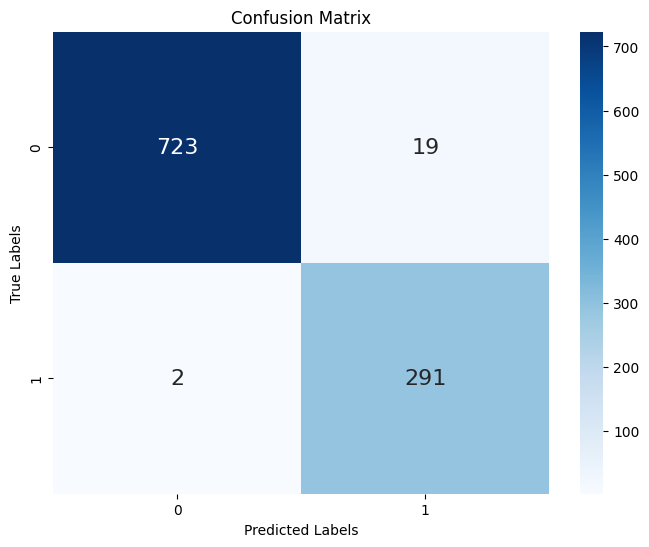

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predicted labels (y_pred) and true labels (y_true)
# y_pred contains the predicted labels (0 for non-spam, 1 for spam) for your test data
# y_true contains the true labels (0 for non-spam, 1 for spam) for your test data

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


```
              Predicted
              |  Non-Spam (0) |  Spam (1)
Actual   |--------------------------------
Non-Spam |   True Negative  | False Positive
(0)      |--------------------------------
Spam     |   False Negative | True Positive
(1)      |--------------------------------
```
**True Negative (TN)**: The model correctly predicted "Non-Spam" for emails that are actually not spam.  
**False Positive (FP)**: The model incorrectly predicted "Spam" for emails that are actually not spam.  
**False Negative (FN):** The model incorrectly predicted "Non-Spam" for emails that are actually spam.  
**True Positive (TP):** The model correctly predicted "Spam" for emails that are actually spam.

### Classification Report

In [13]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming you have predicted labels (y_pred) and true labels (y_test)
# Calculate the classification report as a dictionary
class_names = ['spam','non-spam']
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Convert the dictionary to a Pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Create a copy of the DataFrame with styling options
styled_report_df = report_df.style \
    .format("{:.2f}", subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score']]) \
    .background_gradient(cmap='coolwarm', subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score']]) \
    .set_caption('Classification Report') \
    .set_table_styles([{'selector': 'caption',
                       'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

# Display the styled dataframe
styled_report_df


,precision,recall,f1-score,support
spam,1.00,0.97,0.99,742.000000
non-spam,0.94,0.99,0.97,293.000000
accuracy,0.98,0.98,0.98,0.979710
macro avg,0.97,0.98,0.98,1035.000000
weighted avg,0.98,0.98,0.98,1035.000000


## Test Single Mail

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)


single_message = input("Enter Mail Content")
single_message_lower = single_message.lower()
X_train_tfidf = tfidf_vectorizer.fit_transform(df['text'])
single_message_tfidf = tfidf_vectorizer.transform([single_message_lower])

# Assume you have already made a prediction using your SVM model
prediction = svm_classifier.predict(single_message_tfidf)

# Interpret the prediction
if prediction == 1:
    print("The message is predicted as spam.")
else:
    print("The message is predicted as not spam.")

Enter Mail ContentSubject: Exclusive Summer Sale - Up to 50% Off on Beachwear!  Dear Valued Customer,  Summer is here, and it's time to soak up the sun in style! We are excited to announce our Exclusive Summer Sale, where you can enjoy massive discounts of up to 50% on our latest collection of beachwear and summer essentials.  Discover a world of fashion and comfort with our stunning range of swimsuits, cover-ups, flip-flops, and accessories. Whether you're planning a beach vacation or lounging by the pool, we've got you covered.  Why shop with us?  Trendy and vibrant designs that make a statement High-quality materials for ultimate comfort Sizes and styles for everyone in the family Fast and secure shipping to your doorstep Hassle-free returns and exchanges Don't miss out on this opportunity to upgrade your summer wardrobe without breaking the bank. The Exclusive Summer Sale is for a limited time only, so act fast to snag your favorite pieces.  Shop online now at [YourWebsite.com] or 

### Applying incremental learning by partial fitting

In [ ]:
svm_classifier.partial_fit(single_message_tfidf, prediction, classes=[0, 1])

SGDClassifier(alpha=0.001, max_iter=100, random_state=42)

### Saving the model

In [ ]:
import joblib
from datetime import datetime, timedelta

# Get the current UTC time
current_utc_time = datetime.utcnow()

# Calculate the IST offset (5 hours and 30 minutes)
ist_offset = timedelta(hours=5, minutes=30)

# Calculate the IST time by adding the offset to UTC time
current_ist_time = current_utc_time + ist_offset

# Format the IST date and time in a pretty way
pretty_datetime_ist = current_ist_time.strftime("%A, %B %d, %Y %I:%M %p IST")

# Save the trained SVM model to a file
model_filename = "svm_model.pkl"
joblib.dump(svm_classifier, model_filename)

print(f"Model saved as {model_filename}")
print("Date and Time:", pretty_datetime_ist)


Model saved as svm_model.pkl
Date and Time: Thursday, September 21, 2023 12:33 PM IST
